---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Miguel Zamora Torres**
- Carné: **B78542**
- Grupo: **2**

- Estudiante: **Elias Perez Rojas**
- Carné: **B45271**
- Grupo: **2**

- Estudiante: **Wilmer Mora Pereira**
- Carné: **B95188**
- Grupo: **2**


# `P5` - *Reporte del Proyecto Procesos M/M/s*


## 1. Sistemas M/M/s: determinación teórica del número  𝑠  de servidores necesarios para cumplir el requisito

En este análisis se requiere establecer el número de servidores necesarios para cumplir con ciertos requerimientos para un proceso de vacunación. A partir de estudios realizados, se sabe que cada servidor tiene la capacidad de atender a 0.25 personas/minuto, siendo este el parámetro $\nu$ como la tasa de partidas. Del mismo modo se obtuvo la tasa de llegada $\lambda=7$ personas por minuto. 


Con estos datos se obtiene que con un solo servidor el sistema se inestabiliza, pues $\rho=\frac{\lambda}{s\nu}=\frac{7}{0.25}=28\Rightarrow\rho>1$. Es así que se necesita más de un servidor para la atención de los pacientes, y es esto lo que se desea buscar.


### Parámetros del sistema M/M/s

Los sistemas M/M/s son llamados así porque los procesos de llegada y partida son de tipo cadenas de Markov con $\textit{s}$ servidores. los parámetros de estos sitemas están descritos por las siguientes expresiones:

$$
\Omega_0=\lambda
$$

$$
\Omega_{i\rightarrow i-1}=i\nu\text{ para }0<i<s
$$

$$
\Omega_i=s\nu\text{ para }i>s
$$



**Probabilidad de que hayan cero personas en el sistema**

$$
\Phi_0=\left[ \sum_{k=0}^{s-1}\frac{(s\rho)^k}{k!} +\frac{(s\rho)^s}{s!(1-\rho)}\right]^{-1}
$$


**Probabilidad de estado estable**

$$
\Phi_i=\frac{(s\rho)^i}{i!}\Phi_0\text{ para }i<s
$$

$$
\Phi_i=\frac{s^s\rho^i}{s!}\Phi_0\text{ para }i\geq s
$$


**Promedio de personas en la fila**

$$
L_q=\frac{\rho(s\rho)^s}{s!(1-\rho)^2}\Phi_0
$$


Cada $\Phi_i$ es la probabilidad del estado $\textit{i}$, y así la sumatoria de las probabilidades $\Phi_i$ desde el estado $\textit{i=0}$ hasta un estado cualquiera, es  la probabilidad de que el sistema se encuentre en ese estado final o por debajo. Esto se observa como sigue:

$$
P(\text{X(t) o menos})= \sum_{i=0}^{x}\Phi_i
$$

### Requisitos del proceso

El proceso de vacunación requiere que ante las tasas de llegada y partida obtenidas en el estudio, en la fila no hayan más de 100 personas el 95 % del tiempo de servicio. Para lograr esto, la probabilidad que en el sistema hayan 100 personas en fila más s personas siendo atendidas debe ser mayor o igual a 95 %. Aplicando las expresiones antes vistas para los parámetros del sistema M/M/s, se obtiene la siguiente ecuación:


$$
P(\text{100+s o menos pacientes en el sistema})= \sum_{i=0}^{100+s}\Phi_i
$$

donde se debe tener en cuenta la posición del estado $\textit{i}$ respecto a la cantidad de servidores  $\textit{s}$. para aplicar estas ecuaciones se debe tomar en cuenta la cantidad de servidores para así elegir las ecuaciones de $\Phi_i$. Es por esto que se realizó un código en Python para obtener el valor de $\textit{s}$ que comple con los requisitos. Este se agrega a conituación:




In [8]:
import math
import numpy as np


####################################
# Requerimientos del proceso

Lf = 100; # Cantidad máxima de personas en la fila 
lamb = 7; # Tasa de llegada
v = 0.25; # Tasa de partida
t = 0.95; # Porcentaje tiempo de servicio requerido

####################################

s = 1; # Número de servidores
k = 0; # índices de las sumatorias
i = 0;

####################################
# Sumatorias de los parámetros
suma_o = 0;
suma_i = 0; # Probabilidad de que hayan 100+s o menos pacientes en el sistema


###################################
# Probabilidad de estado cero
phi_0 = 0;



####################################
# En este wile se verifica el cumplimiento de la probabilidad
# de que hayan menos de 100 personas en la fila
while suma_i < t:
    print("************************");
    print("Número de servidores: ",s);
    
    # Se calcula el rho
    p = lamb/(s*v);
    
    
    # Hay un denominador en Phi_0 que puede ser cero, 
    # que se maneja con el try
    try:
        x = pow(s*p,s)/(math.factorial(s)*(1-p));
    except:
        print("División entre cero, pues rho = 1. Se aproximará rho a 0.999999 para que no hayan errores");
        x = pow(s*p,s)/(math.factorial(s)*(0.000001));
        
        
        
        
    k = 0;
    suma_o = 0; # Se reinicia la sumatoria 
    
    
    ####################################
    # Se realiza la sumatoria que se encuentra en Phi_0
    while k <= (s-1):
        suma_o = suma_o + ((pow(s*p,k))/(math.factorial(k)));
        k = k + 1; # Se incrementa el índice k

    phi_0 = 1/(suma_o + x); # Se calcula Phi_0
    print("Probabilidad de que hayan 0 personas en el sistema: {:.2f}".format(phi_0));
    
    
    i = 0;
    suma_i = 0; # Se reinicia la sumatoria 
    
    
    ####################################
    # Se realiza la sumatoria de la probabilidad de que el estado en el sistema
    # esté por debajo de 100 personas más las que están siendo atendidas
    
    # Cálculo cuando i<s
    while i < s:
        y1 = pow(s*p,i)/(math.factorial(i));
        suma_i = suma_i + y1*phi_0;
        i = i + 1;   
    
    # Cálculo cuando i>=s
    while i >= s and i <= (Lf + s):
        y2 = (pow(s,s)*pow(p,i))/(math.factorial(s));
        suma_i = suma_i + y2*phi_0;

        i = i + 1; # Se incrementa el índice i
    
    
    # Se imprime en pantalla la probabilidad con cada número de servidores
    print("Probabilidad de que hayan {} o menos personas en la fila es: {}%\n\n".format(Lf,np.format_float_scientific(suma_i*100, precision = 3, exp_digits=2)));
    
    s = s+1; # Se incrementa en 1 el número de servidores
    
    
    
print("\n\n\n FINALIZADO:")
print(" Se requieren {} servidores para cumplir con los requerimientos.".format(s-1))

************************
Número de servidores:  1
Probabilidad de que hayan 0 personas en el sistema: -27.00
Probabilidad de que hayan 100 o menos personas en la fila es: -4.075e+149%


************************
Número de servidores:  2
Probabilidad de que hayan 0 personas en el sistema: -0.87
Probabilidad de que hayan 100 o menos personas en la fila es: -1.500e+119%


************************
Número de servidores:  3
Probabilidad de que hayan 0 personas en el sistema: -0.06
Probabilidad de que hayan 100 o menos personas en la fila es: -2.291e+101%


************************
Número de servidores:  4
Probabilidad de que hayan 0 personas en el sistema: -0.01
Probabilidad de que hayan 100 o menos personas en la fila es: -5.119e+88%


************************
Número de servidores:  5
Probabilidad de que hayan 0 personas en el sistema: -0.00
Probabilidad de que hayan 100 o menos personas en la fila es: -7.732e+78%


************************
Número de servidores:  6
Probabilidad de que hayan 

Al ejecutar el código anterior, donde se pueden ajustar los requerimientos, se obtuvo que se requieren 29 servidores para que el 95% del tiempo de servicio habrán 100 o menos personas en fila. De esta manera, se puede evaluar la ecuación para el promedio de personas en la fila cuando los servidores están ocupados:



$$
L_q=\frac{\rho(s\rho)^s}{s!(1-\rho)^2}\left[ \sum_{k=0}^{s-1}\frac{(s\rho)^k}{k!} +\frac{(s\rho)^s}{s!(1-\rho)}\right]^{-1}
$$


$$
L_q=\frac{\frac{28}{29}(28)^{29}}{29!(1-\frac{28}{29})^2}\left[ \sum_{k=0}^{29-1}\frac{(28)^k}{k!} +\frac{(28)^{29}}{29!(1-\frac{28}{29})}\right]^{-1}
$$


$$
L_q = 2.56x10^{15}\cdot1.12x10^{-14}
$$

$$
L_q = 28.67 \text{ personas}
$$

## 2. Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

Parámetro lambda = 7.0
Parámetro nu = 7.25
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.08 horas.


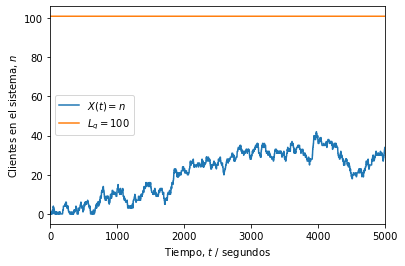

In [5]:
# Primera simulación

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 3300

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 7.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 102

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Analizando la primera simulación

Utilizando en la simulación con $\nu = 7.25$ como el total de servicios por minuto para 29 servidores donde cada uno atiende a 0.25 personas por minuto como se nos indica en el enunciado, para un tiempo de 8 horas aproximadamente, con un número de clientes atendidos en total de 3300, la fila nunca llegan a exceder las 100 personas por más del 5% de las horas, como se observa en la simulación nunca se sobrepasa el límite de solicitudes en fila sino que se mantiene 0%, lo que quiere decir que nunca se llegan a acumular 100 personas en la fila.

Parámetro lambda = 7.0
Parámetro nu = 7.0
Tiempo con más de 100 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.42 horas.


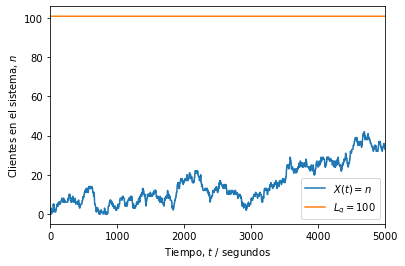

In [7]:
# Segunda simulación

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 3300

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 7/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 102

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Analizando la segunda simulación

Utilizando en la simulación con $\nu = 7$ con un servidor menor, es decir un total de 28,  donde cada uno atiende a 0.25 personas por minuto, con un número de clientes atendidos en total de 3300, en este caso vemos que la simulación dura más de 8 horas esta vez siendo lo único que difiere un poco de las específicaciones, pero vemos que en la fila nunca se llegan a exceder las 100 personas por más del 5% de las horas, como se observa en la simulación nunca se sobrepasa el límite de solicitudes en fila sino que se mantiene 0%, lo que quiere decir que nunca se llegan a acumular 100 personas en la fila esto para el tiempo de esta simulación.

Parámetro lambda = 7.0
Parámetro nu = 5.0
Tiempo con más de 100 solicitudes en fila:
	 88.01%
	 No cumple con la especificación.
Simulación es equivalente a 11.77 horas.


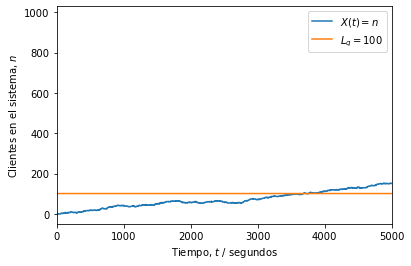

In [9]:
# Tercer simulación

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 3300

# Parámetro de llegada (clientes/segundos)
lam = 7/60

# Parámetro de servicio (servicios/segundos)
nu = 5/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 102

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Analizando la tercera simulación

Utilizando en la simulación un $\nu = 5$ con un aún menos servidores, donde cada uno atiende a 0.25 personas por minuto, con el mismo número de clientes atendidos totales de 3300, para este caso vemos que la simulación excede las 8 horas llegando casi a las 12 horas, además se observa en los resultados que el 88% de tiempo se tienen más de 100 personas en fila esperando el servicio de vacunación por lo que se concluye que esta simulación no cumple con ninguna de las específicaciones deseadas.


---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---